In [2]:
import numpy as np
import pandas as pd

In [3]:
matched_path = "/Users/lukas/Desktop/Projects/MIT/MIT_prosody/precomputed/babylm_runs/csv_files/matched_bs16_audio_pre/version_0/metrics.csv"
unmatched_path = "/Users/lukas/Desktop/Projects/MIT/MIT_prosody/precomputed/babylm_runs/csv_files/unmatched_bs16_audio_pre/csv/version_0/metrics.csv"

In [4]:
df_matched = pd.read_csv(matched_path)
df_unmatched = pd.read_csv(unmatched_path)

df_matched.head()

,train/loss_uni_mam_step,train/loss_uni_mlm_step,train/loss_gc_step,train/loss_mm_mam_step,train/loss_mm_mlm_step,train/loss_audio_text_matching_step,epoch,step
0,0.915194,8.974969,3.486969,3.060845,9.393215,0.027972,0,9
1,0.704190,8.432251,3.484894,3.056186,8.803632,0.057050,0,19
2,1.130643,7.940707,3.474396,3.053435,8.381100,0.025157,0,29
3,0.554691,7.711130,3.471130,3.046912,7.970407,0.025770,0,39
4,0.523369,7.456913,3.467163,3.046632,7.708943,0.018922,0,49


In [5]:
df_unmatched.head()

,train/loss_gc_step,train/loss_mm_mam_step,train/loss_mm_mlm_step,train/loss_audio_text_matching_step,train/loss_uni_mam_step,train/loss_uni_mlm_step,epoch,step
0,2.805298,3.065061,9.739518,0.074905,0.532426,9.046803,0,9
1,2.780701,3.052946,8.954676,0.048984,0.867852,8.674572,0,19
2,2.778870,3.045935,8.447857,0.035759,0.844879,8.315988,0,29
3,2.784058,3.047121,8.236677,0.024925,0.936146,7.940100,0,39
4,2.783386,3.049320,7.746625,0.027766,0.711609,7.216373,0,49


In [6]:
def smooth_signal(x: np.array, window_len: int = 5):
    """smooth signal with a moving average filter"""
    return np.convolve(x, np.ones(window_len) / window_len, mode="same")

In [7]:
import matplotlib.pyplot as plt


def plot_loss_functions(
    losses,
    names,
    y_logscale=False,
    x_logscale=False,
    y_label="Loss",
    x_label="Update steps",
    title="Model comparison",
    proc=None,
    save_path=None,
):
    assert len(losses) == len(names), "The number of losses and names should be equal"

    if proc is not None:
        losses = [proc(loss) for loss in losses]

    min_length = min(len(loss) for loss in losses)
    trimmed_losses = [loss[:min_length] for loss in losses]

    plt.figure(figsize=(10, 6))
    for loss, name in zip(trimmed_losses, names):
        plt.plot(loss, label=name)

    if y_logscale:
        plt.yscale("log")
    if x_logscale:
        plt.xscale("log")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

    if save_path is not None:
        plt.savefig(save_path)

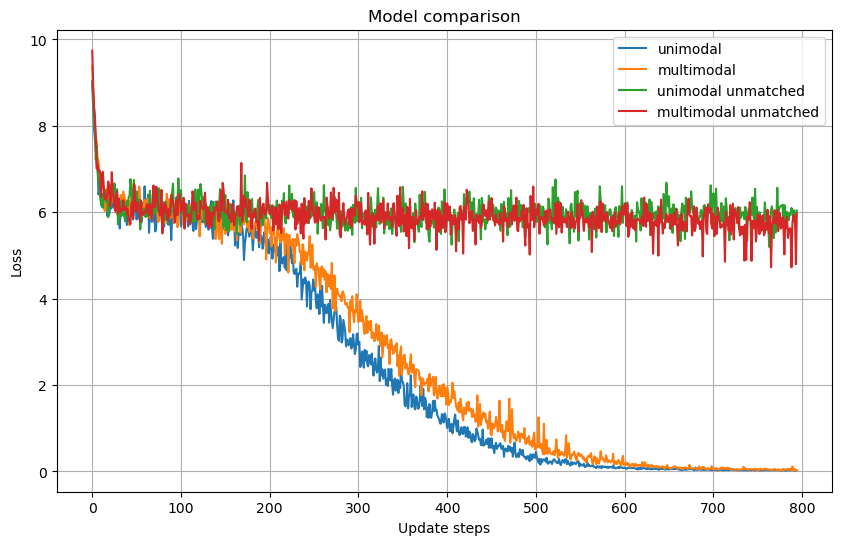

<Figure size 640x480 with 0 Axes>

In [8]:
# plot mlm losses
plot_loss_functions(
    losses=[
        df_matched["train/loss_uni_mlm_step"],
        df_matched["train/loss_mm_mlm_step"],
        df_unmatched["train/loss_uni_mlm_step"],
        df_unmatched["train/loss_mm_mlm_step"],
    ],
    names=["unimodal", "multimodal", "unimodal unmatched", "multimodal unmatched"],
    # proc=smooth_signal,
    save_path="mlm_losses.png",
)

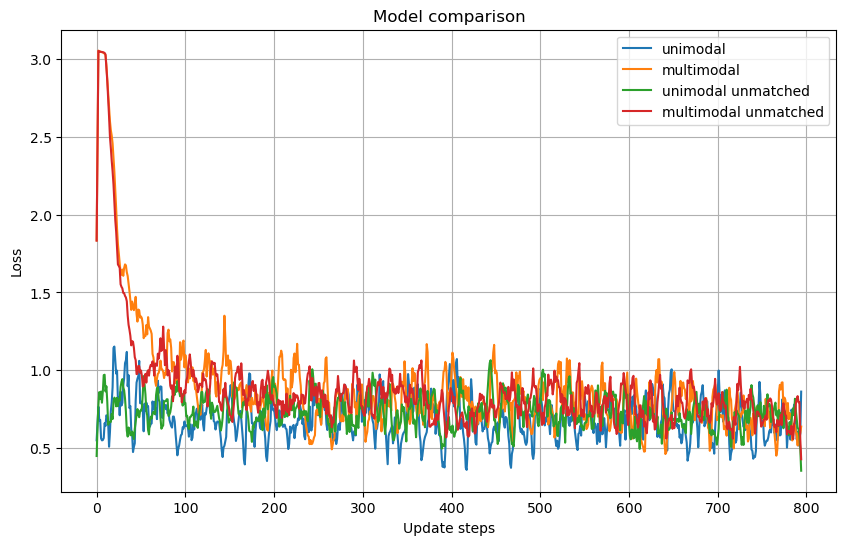

<Figure size 640x480 with 0 Axes>

In [10]:
# plot mam losses

plot_loss_functions(
    losses=[
        df_matched["train/loss_uni_mam_step"],
        df_matched["train/loss_mm_mam_step"],
        df_unmatched["train/loss_uni_mam_step"],
        df_unmatched["train/loss_mm_mam_step"],
    ],
    names=["unimodal", "multimodal", "unimodal unmatched", "multimodal unmatched"],
    proc=smooth_signal,
    save_path="mam_losses.png",
)